In [2]:
import pandas as pd

df = pd.read_csv('/content/train_hsbc_df.csv')

df.head()

df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [9]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/train_hsbc_df.csv')

# Display basic information about the dataset
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows: ", num_duplicates)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Initialize the dictionary to store the LabelEncoders for each categorical feature
labelencoders = {}

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    labelencoders[column] = le  # Store the LabelEncoder for future use

# Now the dataframe 'df' has encoded categorical variables.



Missing Values:
 step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

Data Types:
 step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

Number of duplicate rows:  0


<ipython-input-9-0e5ec92b01df>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
print(df.columns)


Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')


In [11]:
df.columns = df.columns.str.strip()


In [12]:
print(df.head())


   step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     0      3219    3       2           0        34            0         4   
1     0       723    3       2           0        34            0         4   
2     0       362    3       2           0        44            0         6   
3     0      4040    3       2           0        44            0         6   
4     0       969    4       1           0         2            0        14   

   amount  fraud  
0   44.26      1  
1  324.50      1  
2  176.32      1  
3  337.41      1  
4  220.11      1  


In [35]:
print("Class distribution:\n", df['fraud'].value_counts())


Class distribution:
 fraud
0    507443
1      6200
Name: count, dtype: int64


In [14]:
X = df.drop('fraud', axis=1)
y = df['fraud']



In [15]:
pip install imbalanced-learn


In [16]:
print(X.dtypes)


step             int64
customer         int64
age              int64
gender           int64
zipcodeOri       int64
merchant         int64
zipMerchant      int64
category         int64
amount         float64
dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le


In [18]:
X = pd.get_dummies(X)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Assume a threshold to convert the continuous fraud score to a binary target
threshold = 0.5  # Adjust this threshold based on your domain knowledge
df['fraud_binary'] = df['fraud'].apply(lambda x: 1 if x >= threshold else 0)

# 2. Handling Imbalanced Data
X = df.drop(['fraud', 'fraud_binary'], axis=1)
y = df['fraud_binary']

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4. Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 5. Encoding Categorical Variables
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# 6. Scaling/Normalizing Data
scaler = StandardScaler()

# Fit only on training data to avoid data leakage
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Verify the preprocessing process
print("\nPreprocessed Training Data:\n", X_train_scaled.head())
print("\nPreprocessed Test Data:\n", X_test_scaled.head())



Preprocessed Training Data:
        step  customer       age    gender  zipcodeOri  merchant  zipMerchant  \
0 -1.616732 -1.609975 -0.677661  1.524529         0.0 -0.877617          0.0   
1 -0.283576 -1.194615  1.759481 -0.642607         0.0  1.261378          0.0   
2 -1.119286  1.379072 -0.677661 -0.642607         0.0  0.191881          0.0   
3  1.646517  1.323290  0.134719 -0.642607         0.0  1.083129          0.0   
4 -0.144291 -0.500346 -0.677661 -0.642607         0.0 -0.877617          0.0   

   category    amount  
0  0.768265 -0.366770  
1  0.179210  0.274319  
2  0.768265 -0.390837  
3  1.062792  3.849430  
4  0.768265 -0.436816  

Preprocessed Test Data:
        step  customer       age    gender  zipcodeOri  merchant  zipMerchant  \
0 -0.601941  1.596192  0.947100 -0.642607         0.0  1.528752          0.0   
1 -0.482554 -0.556986 -0.677661 -0.642607         0.0 -1.055866          0.0   
2 -0.124393 -0.451430 -1.490042 -0.642607         0.0  1.707002          0.0   

In [21]:
# 1. Save the preprocessed training data to a CSV file
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# 2. Save the preprocessed test data to a CSV file
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [22]:
train_data_link = 'X_train_scaled.csv'
train_labels_link = 'y_train.csv'
test_data_link = 'X_test_scaled.csv'
test_labels_link = 'y_test.csv'

# Display download links
print(f"Download Training Data: {train_data_link}")
print(f"Download Training Labels: {train_labels_link}")
print(f"Download Test Data: {test_data_link}")
print(f"Download Test Labels: {test_labels_link}")


Download Training Data: X_train_scaled.csv
Download Training Labels: y_train.csv
Download Test Data: X_test_scaled.csv
Download Test Labels: y_test.csv


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Assume a threshold to convert the continuous fraud score to a binary target
threshold = 0.5  # Adjust this threshold based on your domain knowledge
df['fraud_binary'] = df['fraud'].apply(lambda x: 1 if x >= threshold else 0)

# 2. Handling Imbalanced Data
X = df.drop(['fraud', 'fraud_binary'], axis=1)
y = df['fraud_binary']

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4. Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 5. Encoding Categorical Variables
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# 6. Scaling/Normalizing Data
scaler = StandardScaler()

# Fit only on training data to avoid data leakage
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Verify the preprocessing process
print("\nPreprocessed Training Data:\n", X_train_scaled.head())
print("\nPreprocessed Test Data:\n", X_test_scaled.head())



Preprocessed Training Data:
        step  customer       age    gender  zipcodeOri  merchant  zipMerchant  \
0 -1.616732 -1.609975 -0.677661  1.524529         0.0 -0.877617          0.0   
1 -0.283576 -1.194615  1.759481 -0.642607         0.0  1.261378          0.0   
2 -1.119286  1.379072 -0.677661 -0.642607         0.0  0.191881          0.0   
3  1.646517  1.323290  0.134719 -0.642607         0.0  1.083129          0.0   
4 -0.144291 -0.500346 -0.677661 -0.642607         0.0 -0.877617          0.0   

   category    amount  
0  0.768265 -0.366770  
1  0.179210  0.274319  
2  0.768265 -0.390837  
3  1.062792  3.849430  
4  0.768265 -0.436816  

Preprocessed Test Data:
        step  customer       age    gender  zipcodeOri  merchant  zipMerchant  \
0 -0.601941  1.596192  0.947100 -0.642607         0.0  1.528752          0.0   
1 -0.482554 -0.556986 -0.677661 -0.642607         0.0 -1.055866          0.0   
2 -0.124393 -0.451430 -1.490042 -0.642607         0.0  1.707002          0.0   

Random Forest


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC, use probabilities


In [26]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC, use probabilities


In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)



Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
AUC-ROC: 1.00

Confusion Matrix:
 [[100809    680]
 [   163 101326]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    101489
           1       0.99      1.00      1.00    101489

    accuracy                           1.00    202978
   macro avg       1.00      1.00      1.00    202978
weighted avg       1.00      1.00      1.00    202978



In [ ]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    101489
           1       0.99      1.00      1.00    101489

    accuracy                           1.00    202978
   macro avg       1.00      1.00      1.00    202978
weighted avg       1.00      1.00      1.00    202978



In [29]:
print("Sample X_test_scaled:\n", X_test_scaled.head())
print("Sample y_test:\n", y_test.head())
print("Sample y_pred:\n", y_pred[:10])


Sample X_test_scaled:
        step  customer       age    gender  zipcodeOri  merchant  zipMerchant  \
0 -0.601941  1.596192  0.947100 -0.642607         0.0  1.528752          0.0   
1 -0.482554 -0.556986 -0.677661 -0.642607         0.0 -1.055866          0.0   
2 -0.124393 -0.451430 -1.490042 -0.642607         0.0  1.707002          0.0   
3 -1.019797  1.480337  0.947100  1.524529         0.0 -0.877617          0.0   
4 -1.835609 -0.941452  0.947100 -0.642607         0.0 -1.768864          0.0   

   category    amount  
0 -1.293426 -0.126572  
1  1.062792 -0.124996  
2 -0.115317 -0.177476  
3  0.768265 -0.399811  
4  1.062792 -0.089049  
Sample y_test:
 549833    1
544950    1
611023    1
103221    0
696363    1
Name: fraud_binary, dtype: int64
Sample y_pred:
 [1 1 1 0 1 1 0 1 1 0]


Results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate predictions (assuming y_pred and y_pred_proba are already defined)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Extract True Positives, True Negatives, False Positives, False Negatives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Specificity
specificity = TN / (TN + FP)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Specificity: {specificity:.2f}")

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 1.00
Precision: 0.99
Recall (Sensitivity): 1.00
F1 Score: 1.00
AUC-ROC: 1.00
Specificity: 0.99

Confusion Matrix:
 [[100823    666]
 [    74 101415]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    101489
           1       0.99      1.00      1.00    101489

    accuracy                           1.00    202978
   macro avg       1.00      1.00      1.00    202978
weighted avg       1.00      1.00      1.00    202978



In [ ]:
Svm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assume a threshold to convert the continuous fraud score to a binary target
threshold = 0.5
df['fraud_binary'] = (df['fraud'] >= threshold).astype(int)

# Separate features and target
X = df.drop(['fraud', 'fraud_binary'], axis=1)
y = df['fraud_binary']

# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the Dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))]), categorical_features)
    ])

# Create and fit the SVM model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate Specificity
TN, FP, FN, TP = conf_matrix.ravel()
specificity = TN / (TN + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Specificity: {specificity:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)




Linear regression

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assume a continuous target variable for regression
target = 'fraud'  # replace with the actual target column name

# Separate features and target
X = df.drop(target, axis=1)
y = df[target]

# Apply SMOTE to handle imbalanced data (if necessary, though it's less common for regression)
# SMOTE is generally used for classification, so you might skip this step for regression
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the Dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))]), categorical_features)
    ])

# Create and fit the Linear Regression model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Mean Squared Error: 0.00
R^2 Score: 1.00


Visualizing the dataset



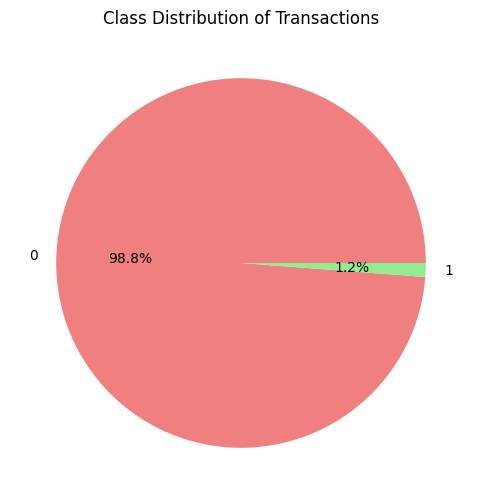

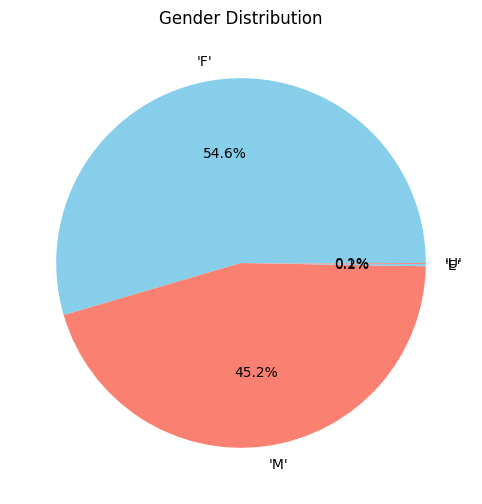

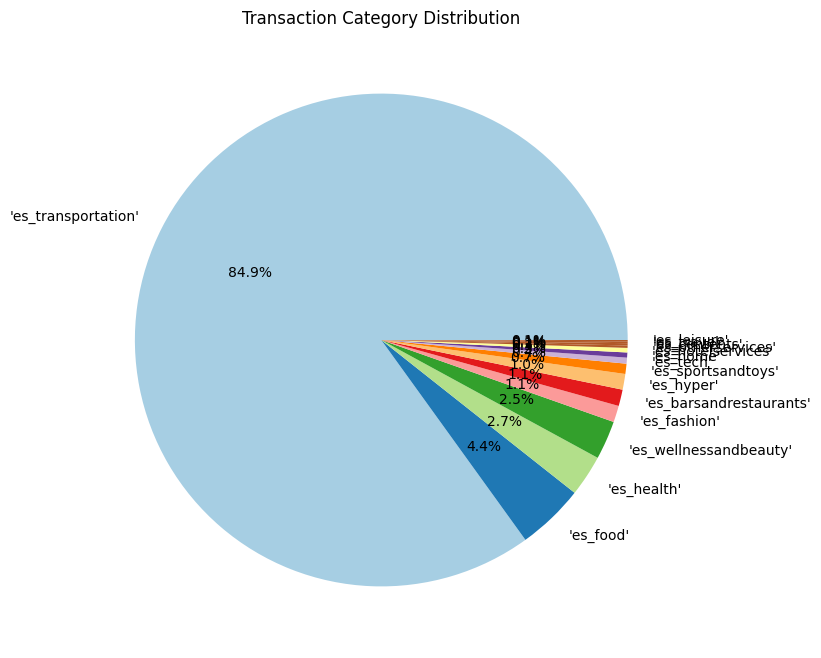

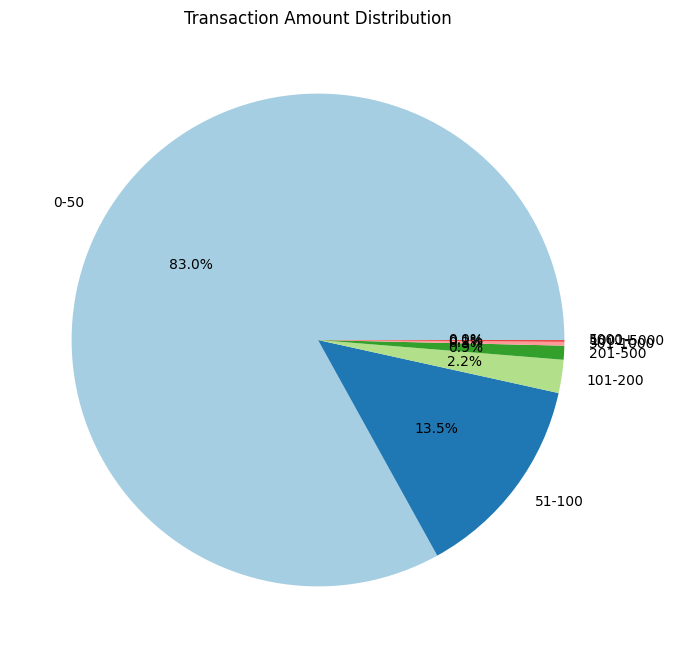

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/train_hsbc_df.csv')

# Save a sample of the dataset to a file for inclusion in the report
df_sample = df.head()
df_sample.to_csv('dataset_sample.csv', index=False)

# 1. Class Distribution

# Get the class distribution
class_distribution = df['fraud'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Class Distribution of Transactions')
plt.savefig('class_distribution_pie_chart.png')
plt.show()

# 2. Gender Distribution

# Gender distribution
gender_distribution = df['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.savefig('gender_distribution_pie_chart.png')
plt.show()

# 3. Transaction Category Distribution

# Category distribution
category_distribution = df['category'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_distribution))))
plt.title('Transaction Category Distribution')
plt.savefig('category_distribution_pie_chart.png')
plt.show()

# 4. Transaction Amount Distribution (Optional)

# Amount distribution (binned for visualization purposes)
bins = [0, 50, 100, 200, 500, 1000, 5000, df['amount'].max()]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5000+']
df['amount_binned'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)

# Amount distribution
amount_distribution = df['amount_binned'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(amount_distribution, labels=amount_distribution.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(amount_distribution))))
plt.title('Transaction Amount Distribution')
plt.savefig('amount_distribution_pie_chart.png')
plt.show()

